### Train test split
75% of data is split into training, 25% split into testing

In [2]:
# load pima indians diabetes data set
import pandas as pd
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/pima.csv'
pima = pd.read_csv(path)
pima.head(5)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Goal: predict if a person had diabetes. Diabetes in a person is marked by label (1 yes 0 no)

In [3]:
#feature matrix X, target vector y
X = pima.drop('label', axis=1)
y = pima.label

In [4]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.75)


In [5]:
# setup knn model
from sklearn.neighbors import KNeighborsClassifier as knn
knn_clf = knn(n_neighbors=10)

In [6]:
# fit data in model
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [7]:
# make predictions for the testing set
y_test_pred = knn_clf.predict(X_test)

In [8]:
# evaluation metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

In [9]:
# percentage fo correct classification
accuracy_score(y_test,y_test_pred)

0.6927083333333334

In [10]:
recall_score(y_test,y_test_pred)

0.4225352112676056

In [11]:
precision_score(y_test,y_test_pred)

0.625

In [12]:
confusion_matrix(y_test,y_test_pred)

array([[103,  18],
       [ 41,  30]], dtype=int64)

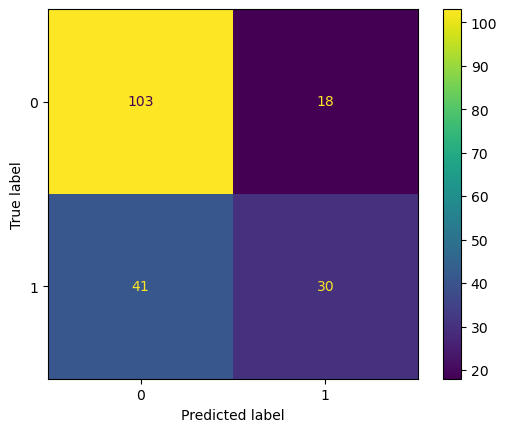

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn_clf, X_test, y_test)

In [14]:
# repeat model multiple times
from sklearn.model_selection import cross_val_score

In [15]:
scores = cross_val_score(knn_clf, X,y, cv=20, scoring='accuracy')
scores.mean()

0.7411605937921728

## grid search: efficiently searching for optimal hyperparameters

In [16]:
# define hyperparameter value that should be searched
pima.head(3) # we are trying to predict the 'label' column

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier() # we'll use default hypeparameters(n_neighbors, weights)

In [20]:
# matrix X, target vector y
X = pima.drop('label', axis=1)
y = pima.label

In [21]:
# train - test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [22]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
# evaluate our knn model
from sklearn.metrics import accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay
y_test_pred = knn_clf.predict(X_test)
print(accuracy_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))
print(precision_score(y_test,y_test_pred))

0.734375
0.5217391304347826
0.6666666666666666


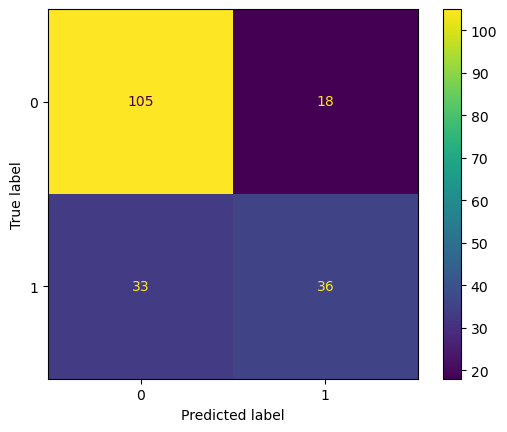

In [24]:
# evaluate model using confusion matrix
ConfusionMatrixDisplay.from_estimator(knn_clf, X_test,y_test)

In [25]:
# create a hyperparameter dictionary
k_range = list(range(1,51)) # number of neighors in knn model to test
grid_dic = {'n_neighbors':k_range, 'weights':['uniform', 'distance']}
knn_clf.n_neighbors = 5

In [26]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knn_clf, grid_dic, cv=10, scoring='accuracy', n_jobs= -1, verbose=1)

In [27]:
grid.fit(X,y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [28]:
# grid search results
results = pd.DataFrame(grid.cv_results_)
results[['mean_test_score', 'params']]

,mean_test_score,params
0,0.679665,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.679665,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.712235,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.679665,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.703059,"{'n_neighbors': 3, 'weights': 'uniform'}"
...,...,...
95,0.744891,"{'n_neighbors': 48, 'weights': 'distance'}"
96,0.731921,"{'n_neighbors': 49, 'weights': 'uniform'}"
97,0.743575,"{'n_neighbors': 49, 'weights': 'distance'}"
98,0.722796,"{'n_neighbors': 50, 'weights': 'uniform'}"


In [29]:
# best hyperparameters
grid.best_params_

{'n_neighbors': 17, 'weights': 'uniform'}

In [30]:
# best score
grid.best_score_

0.7552973342447027

In [31]:
# best knn classifier
best_knn_clf = grid.best_estimator_
best_knn_clf

KNeighborsClassifier(n_neighbors=17)

In [32]:
# test best knn classifier
y_test_pred = best_knn_clf.predict(X_test)
print(accuracy_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))
print(precision_score(y_test,y_test_pred))

0.7864583333333334
0.5507246376811594
0.7916666666666666


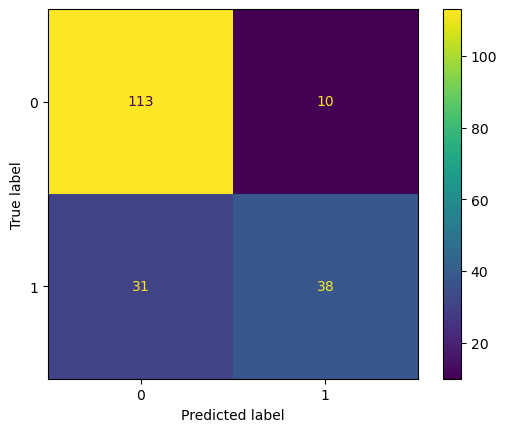

In [33]:
ConfusionMatrixDisplay.from_estimator(best_knn_clf,X_test,y_test)